In [1]:
import numpy as np
import cirq
#import qsimcirq
import skquant.opt as skqopt #optimization routines
from matplotlib import pyplot as plt #plotting tool

In [2]:
class ZGRY4(cirq.Gate):

    def __init__(self, thetas, inverse=False):
        if (len(thetas)!=15):
            raise ValueError("thetas must be a list of 15 variational parameters")
        self.thetas=thetas
        self.inverse=inverse

    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return 4

    def _decompose_(self, q):
        #AltSO(4) gate object takes two qubits as input
        if (not self.inverse):
          # circuit for A1
        
           # on 1st qubit
            yield cirq.ry(self.thetas[0]).on(q[0])
           # on 2nd qubit 
            yield cirq.CNOT(q[0],q[1])
            yield cirq.ry(self.thetas[1]).on(q[1])
            yield cirq.CNOT(q[0],q[1])
            yield cirq.ry(self.thetas[2]).on(q[1])
           # on 3rd qubit 
            yield cirq.CNOT(q[0],q[2])
            yield cirq.ry(self.thetas[3]).on(q[2])
            yield cirq.CNOT(q[1],q[2])
            yield cirq.ry(self.thetas[4]).on(q[2])
            yield cirq.CNOT(q[0],q[2])
            yield cirq.ry(self.thetas[5]).on(q[2])
            yield cirq.CNOT(q[1],q[2])
            yield cirq.ry(self.thetas[6]).on(q[2])
           # on 4th qubit
            yield cirq.CNOT(q[0],q[3])
            yield cirq.ry(self.thetas[7]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.ry(self.thetas[8]).on(q[3])
            yield cirq.CNOT(q[1],q[3])
            yield cirq.ry(self.thetas[9]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.ry(self.thetas[10]).on(q[3])
            yield cirq.CNOT(q[0],q[3])
            yield cirq.ry(self.thetas[11]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.ry(self.thetas[12]).on(q[3])
            yield cirq.CNOT(q[1],q[3])
            yield cirq.ry(self.thetas[13]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.ry(self.thetas[14]).on(q[3])
             
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(4))))

In [3]:
class ZGRZ4(cirq.Gate):

    def __init__(self, thetas, inverse=False):
        if (len(thetas)!=15):
            raise ValueError("thetas must be a list of 15 variational parameters")
        self.thetas=thetas
        self.inverse=inverse

    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return 4

    def _decompose_(self, q):
        #AltSO(4) gate object takes two qubits as input
        if (not self.inverse):
          # circuit for A1
        
           # on 1st qubit
            yield cirq.rz(self.thetas[0]).on(q[0])
           # on 2nd qubit 
            yield cirq.CNOT(q[0],q[1])
            yield cirq.rz(self.thetas[1]).on(q[1])
            yield cirq.CNOT(q[0],q[1])
            yield cirq.rz(self.thetas[2]).on(q[1])
           # on 3rd qubit 
            yield cirq.CNOT(q[0],q[2])
            yield cirq.rz(self.thetas[3]).on(q[2])
            yield cirq.CNOT(q[1],q[2])
            yield cirq.rz(self.thetas[4]).on(q[2])
            yield cirq.CNOT(q[0],q[2])
            yield cirq.rz(self.thetas[5]).on(q[2])
            yield cirq.CNOT(q[1],q[2])
            yield cirq.rz(self.thetas[6]).on(q[2])
           # on 4th qubit
            yield cirq.CNOT(q[0],q[3])
            yield cirq.rz(self.thetas[7]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.rz(self.thetas[8]).on(q[3])
            yield cirq.CNOT(q[1],q[3])
            yield cirq.rz(self.thetas[9]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.rz(self.thetas[10]).on(q[3])
            yield cirq.CNOT(q[0],q[3])
            yield cirq.rz(self.thetas[11]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.rz(self.thetas[12]).on(q[3])
            yield cirq.CNOT(q[1],q[3])
            yield cirq.rz(self.thetas[13]).on(q[3])
            yield cirq.CNOT(q[2],q[3])
            yield cirq.rz(self.thetas[14]).on(q[3])
             
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(4))))

In [4]:
class UZGR(cirq.Gate):
    def __init__(self, n, d, l, inverse=False):
        #n := number of qubits
        #d := depth (number of layers)
        #l := list of variational parameters. Must be 6*(n-1)*d parameters
        #we specify the variational parameter when we declare a U gate object
        if (len(l)!=(15)):
            raise ValueError("Incorrect number of parameters. l must be of length 15*(n-1)*d")
        self.n=n
        self.d=d
        self.l=l
        self.inverse=inverse
    
    def _decompose_(self, q):
        yield ZGRY4(self.l[0:15]).on(q[0:4])
        #yield ZGRY4(self.l[15:30]).on(*q[4:8])
        #U gate object takes in n qubits as input
        #if (not self.inverse):
            #for i in range(self.d):
                #for j in range(0,self.n-1,4):
                    #yield ZGRY4(self.l[0:15]).on(*q[0:4])
        
                    
        
    def _num_qubits_(self):
        #We are required to implement this method, 
        #it specifies the number of qubits our gate acts on
        return self.n   
    
    def _unitary_(self):
        #Some other method we need in order to get inverses of U to work
        #as we will need them in our circuits
        return cirq.unitary(cirq.Circuit(self._decompose_(cirq.LineQubit.range(self.n))))
    

In [5]:
d=1
n=10

In [50]:
def checkwave(l,d,n):
    #create circuit object for adding gates to
    circuit = cirq.Circuit()
    #specify number of qubits we want in our circuit
    q = [cirq.GridQubit(0, i) for i in range(n)]
    
    #Add our custom gate class U to our circuit and make sure it acts
    #on all qubits *q
    
    circuit.append(ZGRY4(l[1:16]).on(*q[2:6]))
    circuit.append(ZGRY4(l[16:31]).on(*q[6:10]))
    circuit.append(ZGRY4(l[31:46]).on(*q[4:8]))
    circuit.append(ZGRY4(l[46:61]).on(*q[2:6]))
    circuit.append(ZGRY4(l[61:76]).on(*q[6:10]))
    
    #circuit.append(UZGR(n=8,d=1,l=l[16:31]).on(*q[2:]))
    
    
    circuit.append(ZGRZ4(l[76:91]).on(*q[2:6])) 
    circuit.append(ZGRZ4(l[91:106]).on(*q[6:10]))
    circuit.append(ZGRZ4(l[106:121]).on(*q[4:8]))
    circuit.append(ZGRZ4(l[121:136]).on(*q[2:6])) 
    circuit.append(ZGRZ4(l[136:151]).on(*q[6:10]))
    
    circuit.append(cirq.qft(*q))
    
    #print(circuit)

    #Create simulator object
    simulator = cirq.Simulator()
    
    #Direct wavefunction access
    result = simulator.simulate(circuit).state_vector()
  
    func = l[0]*np.real(result)
    return func

In [49]:
x0=np.concatenate(([10*np.random.random()],2*np.pi*np.random.rand(150)))
checkwave(x0,d,n)

(0, 0): ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────qft───
                                                                                                                                                                                                                                                                                                           │
(0, 1): ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────#2────
                                                                                       

array([0.3428981 , 0.3622674 , 0.21770377, ..., 0.10377187, 0.0347524 ,
       0.16336073], dtype=float32)

In [51]:
def f(l):
    x=np.linspace(0,1,2**n)
    return np.linalg.norm(checkwave(l,d,n)-np.sin(np.pi*x)-np.sin(2*np.pi*x))**2

In [52]:
bounds = [[0,100]] #first bound is lambda0, best choice of bounds usually
#depends on number of qubits we are using

#the rest of the bounds are the angle theta in Ry(theta)
for i in range(150):
    bounds.append([0,2*np.pi])

In [53]:
budget = 30000

In [54]:
x0=np.concatenate(([100*np.random.random()],2*np.pi*np.random.rand(150)))
#Optimize using Imfil
result, history = skqopt.minimize(f, x0, bounds, budget, method='imfil')

In [55]:
linit=result.optpar

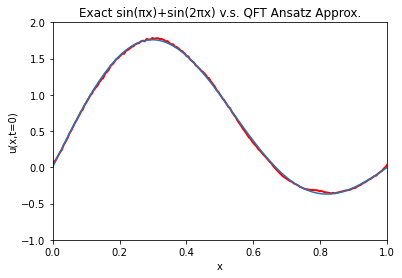

In [56]:
fig = plt.figure()
y=np.linspace(0,1,2**n)
ax = plt.axes(xlim=(0, 1), ylim=(-1, 2))
line, = ax.plot(y, checkwave(linit,d,n), 'r', lw=2)
line2, = ax.plot(y, np.sin(np.pi*y)+np.sin(2*np.pi*y))
plt.xlabel('x')
plt.ylabel('u(x,t=0)')
plt.title('Exact sin(πx)+sin(2πx) v.s. QFT Ansatz Approx.')
plt.savefig('qftplot.png')

In [57]:
f(linit)

0.27049089576898894